# Convolutional Neural Networks

# Importar Librerías

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [3]:
dirname = os.path.join(os.getcwd(),'/Users/rafaelfabiansilva/IA2/NewPhotos')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /Users/rafaelfabiansilva/IA2/NewPhotos/
/Users/rafaelfabiansilva/IA2/NewPhotos/Anturio 1
/Users/rafaelfabiansilva/IA2/NewPhotos/Orquideas 10000
/Users/rafaelfabiansilva/IA2/NewPhotos/LiliHolandesa 10175
/Users/rafaelfabiansilva/IA2/NewPhotos/bugambilias 10120
/Users/rafaelfabiansilva/IA2/NewPhotos/RositaBelen 9845
Directorios leidos: 5
Imagenes en cada directorio [10001, 10175, 10120, 9845, 11055]
suma Total de imagenes en subdirs: 51196


# Creamos las etiquetas

In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  51196


In [5]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 Anturio
1 Orquideas
2 LiliHolandesa
3 bugambilias
4 RositaBelen


In [6]:
y = np.array(labels)
X = np.array(images) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [7]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (40956, 50, 50, 3) (40956,)
Testing data shape :  (10240, 50, 50, 3) (10240,)


Text(0.5, 1.0, 'Ground Truth : 4')

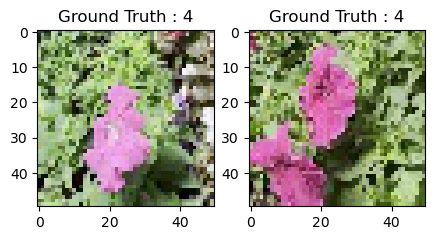

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

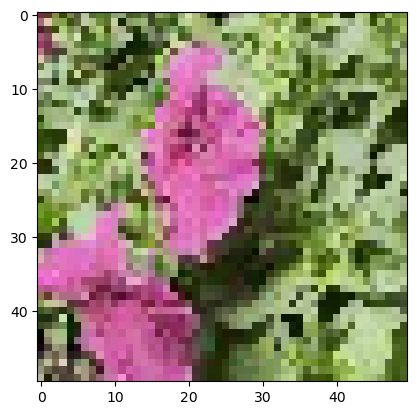

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]


# Creamos el Set de Entrenamiento y Validación

In [11]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(32764, 50, 50, 3) (8192, 50, 50, 3) (32764, 5) (8192, 5)


# Creamos el modelo de CNN

In [13]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [14]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(50,50,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
sport_model.add(Activation('relu'))
sport_model.add(MaxPooling2D((2, 2), padding='same'))
sport_model.add(Dropout(0.5))

#sport_model.add(Conv2D(128, kernel_size=(3, 3), activation='linear', padding='same'))
#sport_model.add(Activation('relu'))
#sport_model.add(MaxPooling2D((2, 2), padding='same'))
#sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [15]:
sport_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 25, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 activation (Activation)     (None, 25, 25, 64)        0         
                                                        

In [16]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [17]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
512/512 [==============================] - 16s 30ms/step - loss: 1.5778 - accuracy: 0.2587 - val_loss: 1.5133 - val_accuracy: 0.4999
Epoch 2/20
512/512 [==============================] - 15s 30ms/step - loss: 1.3938 - accuracy: 0.4052 - val_loss: 1.2482 - val_accuracy: 0.7517
Epoch 3/20
512/512 [==============================] - 16s 31ms/step - loss: 1.1042 - accuracy: 0.5641 - val_loss: 0.9232 - val_accuracy: 0.7877
Epoch 4/20
512/512 [==============================] - 16s 32ms/step - loss: 0.8481 - accuracy: 0.6757 - val_loss: 0.6538 - val_accuracy: 0.8342
Epoch 5/20
512/512 [==============================] - 16s 32ms/step - loss: 0.6689 - accuracy: 0.7523 - val_loss: 0.4853 - val_accuracy: 0.8850
Epoch 6/20
512/512 [==============================] - 16s 32ms/step - loss: 0.5450 - accuracy: 0.8080 - val_loss: 0.3822 - val_accuracy: 0.9113
Epoch 7/20
512/512 [==============================] - 16s 32ms/step - loss: 0.4600 - accuracy: 0.8394 - val_loss: 0.3145 - val_accuracy:

In [18]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
#sport_model.save("/Users/rafaelfabiansilva/IA2/Modelo entrenado/FloresModel1.h5py")

# Evaluamos la red

In [19]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

320/320 [==============================] - 1s 4ms/step - loss: 0.0984 - accuracy: 0.9668


In [20]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.09837299585342407
Test accuracy: 0.966796875


In [21]:
sport_train.history

{'loss': [1.577762246131897,
  1.393810749053955,
  1.1042144298553467,
  0.8481296300888062,
  0.668936550617218,
  0.5449962019920349,
  0.4600300192832947,
  0.39826005697250366,
  0.35068196058273315,
  0.3127376139163971,
  0.28093811869621277,
  0.25884371995925903,
  0.24003395438194275,
  0.22281114757061005,
  0.21210993826389313,
  0.1971772164106369,
  0.1873234212398529,
  0.17708779871463776,
  0.16749346256256104,
  0.16086608171463013],
 'accuracy': [0.25866806507110596,
  0.4052313566207886,
  0.5640947222709656,
  0.6757416725158691,
  0.7523196339607239,
  0.8080210089683533,
  0.8393663763999939,
  0.8614943027496338,
  0.8787388801574707,
  0.8949761986732483,
  0.9061470031738281,
  0.912983775138855,
  0.9192406535148621,
  0.9278171062469482,
  0.9286412000656128,
  0.9334330558776855,
  0.9386826753616333,
  0.941643238067627,
  0.9443596601486206,
  0.9467403292655945],
 'val_loss': [1.513342261314392,
  1.2482458353042603,
  0.9231704473495483,
  0.65378582477

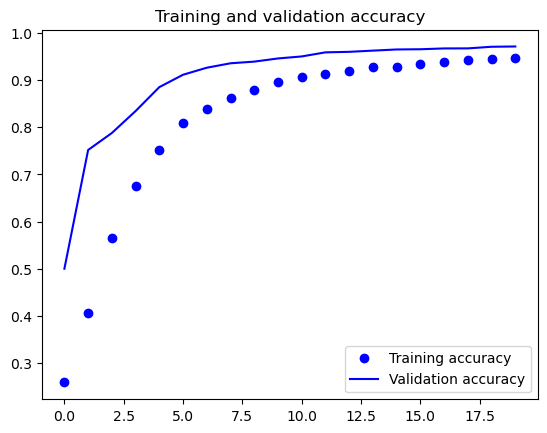

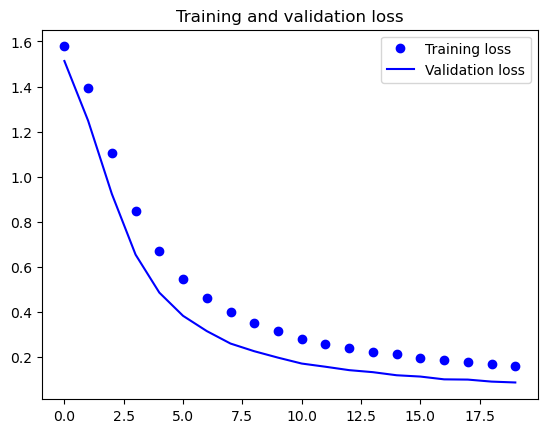

In [22]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
predicted_classes2 = sport_model.predict(test_X)

320/320 [==============================] - 1s 4ms/step


In [24]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [25]:
predicted_classes.shape, test_Y.shape

((10240,), (10240,))

# Aprendamos de los errores: Qué mejorar

Found 9900 correct labels


/var/folders/jp/rj9w1d954bz1qhn56lxlgv6m0000gn/T/ipykernel_24138/1116563287.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


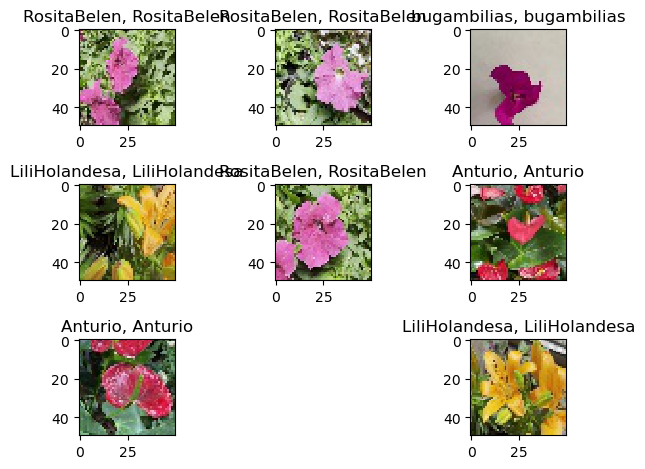

In [26]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(50,50,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 340 incorrect labels


/var/folders/jp/rj9w1d954bz1qhn56lxlgv6m0000gn/T/ipykernel_24138/4002966155.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


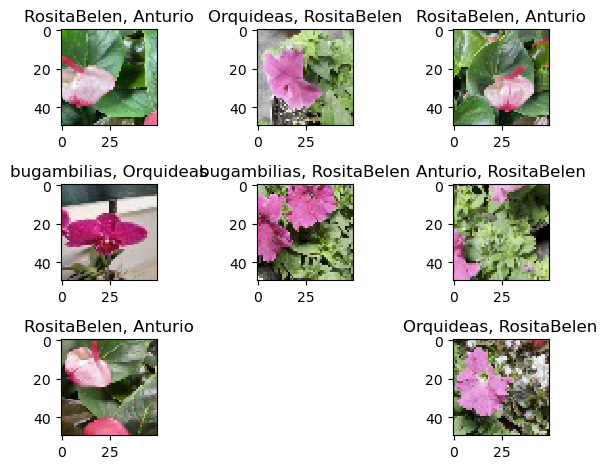

In [27]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(50,50,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [28]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.98      0.91      0.94      2057
     Class 1       0.95      0.99      0.97      1989
     Class 2       0.97      1.00      0.99      2053
     Class 3       0.98      1.00      0.99      1970
     Class 4       0.94      0.94      0.94      2171

    accuracy                           0.97     10240
   macro avg       0.97      0.97      0.97     10240
weighted avg       0.97      0.97      0.97     10240



In [ ]:
#########   Verificar foto

In [45]:
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

# Especifica la ruta de la imagen
filepath = '/Users/rafaelfabiansilva/Downloads/planta-interior-anturio-rojo_81b2f775_1000x1498.jpg'
# Lee la imagen
image = plt.imread(filepath, 0)

# Redimensiona la imagen
image_resized = resize(image, (50, 50), anti_aliasing=True, clip=False, preserve_range=True)

# Convierte la imagen redimensionada a un arreglo numpy
X = np.array([image_resized])

# Realiza la predicción usando el modelo (asegúrate de haber definido 'sport_model' previamente)
predicted_classes = sport_model.predict(X)

# Obtiene la clase predicha para la imagen
predicted_class_index = np.argmax(predicted_classes)

# Imprime la clase predicha
print(f'La imagen {filepath} pertenece a la clase: {deportes[predicted_class_index]}')


1/1 [==============================] - 0s 7ms/step
La imagen /Users/rafaelfabiansilva/Downloads/planta-interior-anturio-rojo_81b2f775_1000x1498.jpg pertenece a la clase: Anturio
